<h1>ContractWard: A Smart Contract Vulnerability Scanner</h1>

In the current landscape, vulnerability scanners for smart contracts, such as Oyente and Slither, rely primarily on symbolic execution, which can be time-intensive, particularly for scanning vulnerabilities in single-file contracts. To address this inefficiency, ContractWard introduces a novel approach by employing machine learning and natural language processing models for vulnerability detection. This innovative method significantly reduces the time required for vulnerability scanning once the models are adequately trained.

## Dataset

The Dataset which is being downloaded is from the huggingface website. here we are focusing on the multilabel dataset covering all the sets like
1. Training
2. Validation
3. Testing

In [ ]:
from datasets import load_dataset_builder, load_dataset

In [ ]:
ds_builder = load_dataset_builder("mwritescode/slither-audited-smart-contracts", 'big-multilabel')

ds_builder.info.description

'This dataset contains source code and deployed bytecode for Solidity Smart Contracts that have been verified on Etherscan.io, along with a classification of their vulnerabilities according to the Slither static analysis framework.\n'

In [ ]:
ds_builder.info.features

{'address': Value(dtype='string', id=None),
 'source_code': Value(dtype='string', id=None),
 'bytecode': Value(dtype='string', id=None),
 'slither': Sequence(feature=ClassLabel(names=['access-control', 'arithmetic', 'other', 'reentrancy', 'safe', 'unchecked-calls'], id=None), length=-1, id=None)}

In [ ]:
dataset = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', revision="main")

dataset

Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/79641 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10861 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither'],
        num_rows: 79641
    })
    test: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither'],
        num_rows: 15972
    })
    validation: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither'],
        num_rows: 10861
    })
})

## Bytecode to Opcode Conversion
In order to make instructions that can be executed by machines readable by humans, bytecode must be converted to opcodes. This procedure is essential for performing security analyses of software, including smart contracts, as well as for comprehending, debugging, and optimizing code. Developers and analysts can find errors and vulnerabilities and improve performance by looking at opcodes.

* mythril library is best performer among other

In [ ]:
# mythril is used to convert bytecode to opcode
import mythril

In [ ]:
def bytecode2opcode(bytecode):
    # Convert the hexadecimal bytecode to a bytearray and disassemble it
    disassembled_ops = mythril.disassembler.asm.disassemble(bytearray.fromhex(bytecode))

    # Use a list comprehension to extract opcodes and join them into a single string
    opcode = ' '.join([op['opcode'] for op in disassembled_ops])

    return opcode.strip()  # Strip any trailing whitespace and return the result


In [ ]:
# Extract bytecodes from the 'train' subset and remove the first two characters
train_bytecodes = [bytecode[2:] for bytecode in dataset['train']['bytecode']]

# Extract bytecodes from both 'test' and 'validation' subsets, remove the first two characters, and combine them
test_bytecodes = [bytecode[2:] for bytecode in dataset['test']['bytecode'] + dataset['validation']['bytecode']]


79641 26833 608060405234801561001057600080fd5b5060043610610202576000357c01000000000000000000000000000000000000000000000000000000009004806386d1a69f1161012c578063b414d4b6116100bf578063f2fde38b1161008e578063f2fde38b146104fd578063fca3b5aa14610523578063fedacfa414610549578063ff1970381461055157610202565b8063b414d4b614610473578063d9aa188114610499578063dd62ed3e146104a1578063e724529c146104cf57610202565b806393c32e06116100fb57806393c32e061461041157806395d89b4114610437578063a42d91d81461043f578063a9059cbb1461044757610202565b806386d1a69f146103d157806387829c65146103db5780638da5cb5b146104015780638f32d59b1461040957610202565b8063313ce567116101a45780634e680654116101735780634e6806541461039357806353b841721461039b5780635f6e84ee146103a357806370a08231146103ab57610202565b8063313ce5671461032c57806335e061fc1461034a57806342966c68146103525780634d853ee51461036f57610202565b806318160ddd116101e057806318160ddd146102de57806323b872dd146102e657806326e5be361461031c57806330cf480b1461032457610202565b806306fdde0314610207578063

In [ ]:
train_opcodes = [bytecode2opcode(bytecode) for bytecode in train_bytecodes[:2000]]
test_opcodes = [bytecode2opcode(bytecode) for bytecode in test_bytecodes[:1000]]

train_opcodes[0]

'PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2 JUMPI PUSH1 DUP1 REVERT JUMPDEST POP PUSH1 CALLDATASIZE LT PUSH2 JUMPI PUSH1 CALLDATALOAD PUSH29 SWAP1 DIV DUP1 PUSH4 GT PUSH2 JUMPI DUP1 PUSH4 GT PUSH2 JUMPI DUP1 PUSH4 GT PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI PUSH2 JUMP JUMPDEST DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI PUSH2 JUMP JUMPDEST DUP1 PUSH4 GT PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI PUSH2 JUMP JUMPDEST DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI PUSH2 JUMP JUMPDEST DUP1 PUSH4 GT PUSH2 JUMPI DUP1 PUSH4 GT PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI PUSH2 JUMP JUMPDEST DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUS

## Bigram Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Initialize CountVectorizer with 'word' analyzer and bi-gram range
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))

# Fit the vectorizer to the combined list of train and test opcodes and transform the data
X = vectorizer.fit_transform(train_opcodes + test_opcodes)

# Retrieve and print the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['add add' 'add addmod' 'add address' ... 'xor swap8' 'xor timestamp'
 'xor xor']


In [ ]:
import pickle as pk

In [ ]:
# Save vectorizer for feature uses
pk.dump(vectorizer, open('ContractWard_Vectorizer_py3.7_main', 'wb'))

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

# Convert the transformed data to a dense array
features = X.toarray()

# Generate column names based on the number of features
columns = [f'feature_{i}' for i in range(features.shape[1])]

# Calculate the split index for 80% training data
split_index = int(len(features) * 0.8)

# Create a DataFrame for the training data (first 80% of the features)
df_train = pd.DataFrame(features[:split_index], columns=columns)

# Create a DataFrame for the test data (remaining 20% of the features)
df_test = pd.DataFrame(features[split_index:], columns=columns)

# Display the first few rows of the training DataFrame
df_train.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12334,feature_12335,feature_12336,feature_12337,feature_12338,feature_12339,feature_12340,feature_12341,feature_12342,feature_12343
0,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0


## Mapping labels

In [ ]:
from collections import defaultdict

In [ ]:
from collections import defaultdict

vulns = ['access-control', 'arithmetic', 'other', 'reentrancy', 'safe', 'unchecked-calls']
train_labels = defaultdict(list)
test_labels = defaultdict(list)

def process_sequences(sequences, label_dict):
    for seq in sequences:
        for i, vuln in enumerate(vulns):
            label_dict[vuln].append(1 if i in seq else 0)

# Process training data sequences
process_sequences(dataset['train']['slither'], train_labels)

# Process test data sequences
process_sequences(dataset['test']['slither'], test_labels)

# Process validation data sequences and append to test labels
process_sequences(dataset['validation']['slither'], test_labels)


In [ ]:
for vuln in vulns:
    df_train[vuln] = train_labels[vuln][:2400]
    df_test[vuln] = test_labels[vuln][:600]

df_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12340,feature_12341,feature_12342,feature_12343,access-control,arithmetic,other,reentrancy,safe,unchecked-calls
0,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,21,0,0,...,0,0,0,0,0,1,1,1,0,0
2,1,0,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,20,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Save Dataset for feature uses
df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)

# Building Vulnerability Scanner

## Dataset Analysis

In [ ]:
# Calculate the index to separate features from labels
ind = len(features[0])

# Split the training DataFrame into features and labels
x_train = df_train.iloc[:, :ind]  # Features for training
y_train = df_train.iloc[:, ind:]  # Labels for training

# Split the test DataFrame into features and labels
x_test = df_test.iloc[:, :ind]   # Features for testing
y_test = df_test.iloc[:, ind:]   # Labels for testing

# Display the first few rows of the training features DataFrame
x_train.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12334,feature_12335,feature_12336,feature_12337,feature_12338,feature_12339,feature_12340,feature_12341,feature_12342,feature_12343
0,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0


## Multi-Label Classification

* Machine Learning Model-1 Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
model = OneVsRestClassifier(SVC(kernel='linear', probability=True))
model.fit(x_train, y_train)


OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

In [ ]:
import pickle

# Save the model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

In [ ]:
# Binarize the output labels
Y_test_binarized = label_binarize(y_test, classes=[*range(6)])
n_classes = Y_test_binarized.shape[1]

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get decision scores
y_score = model.decision_function(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


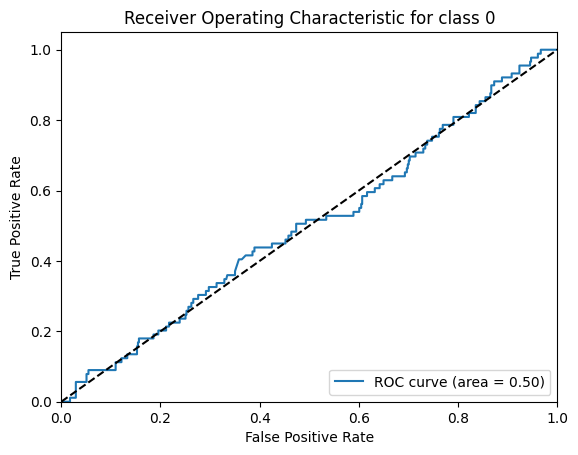

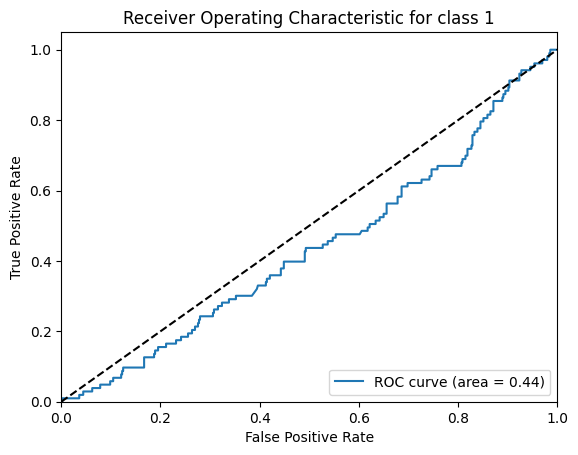

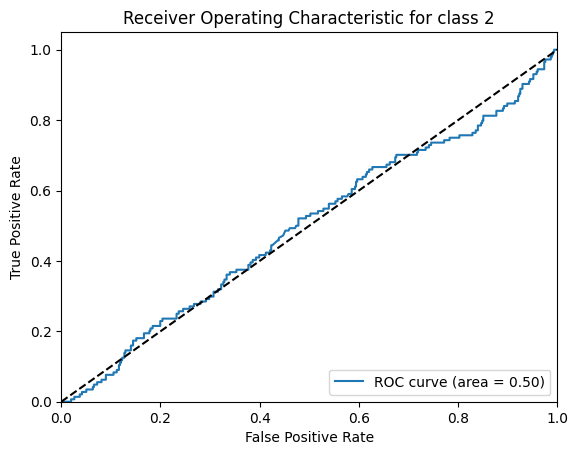

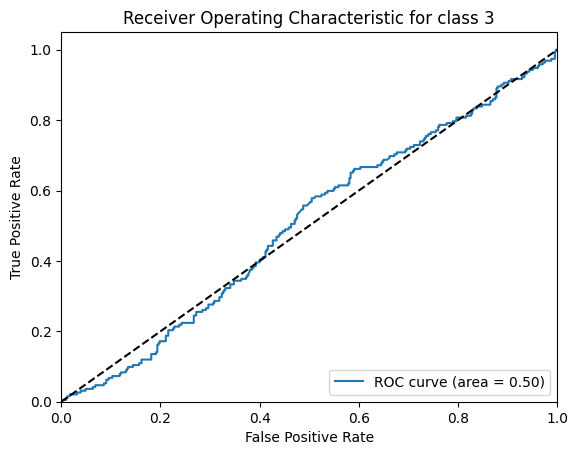

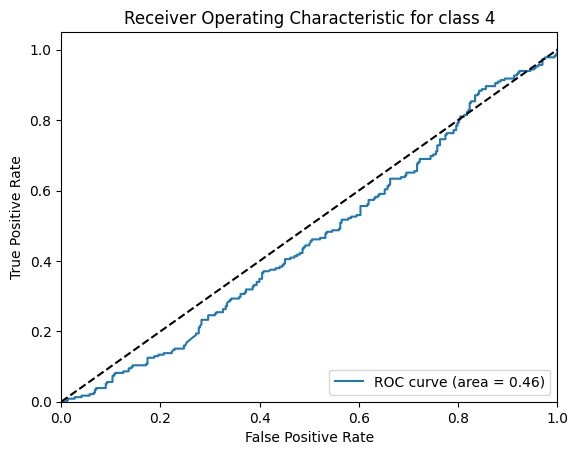

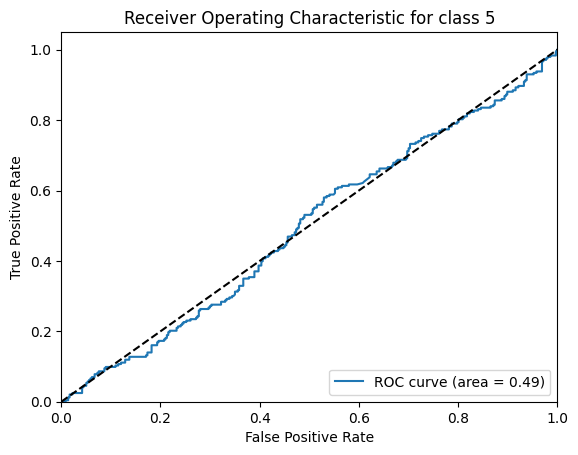

In [ ]:
# Plot all ROC curves
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {i}')
    plt.legend(loc="lower right")
    plt.show()


* Deep Learning Model (Artificial Neural Networks) Model - 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [ ]:
model = Sequential([
    Dense(512, input_shape=(1200,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(6, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


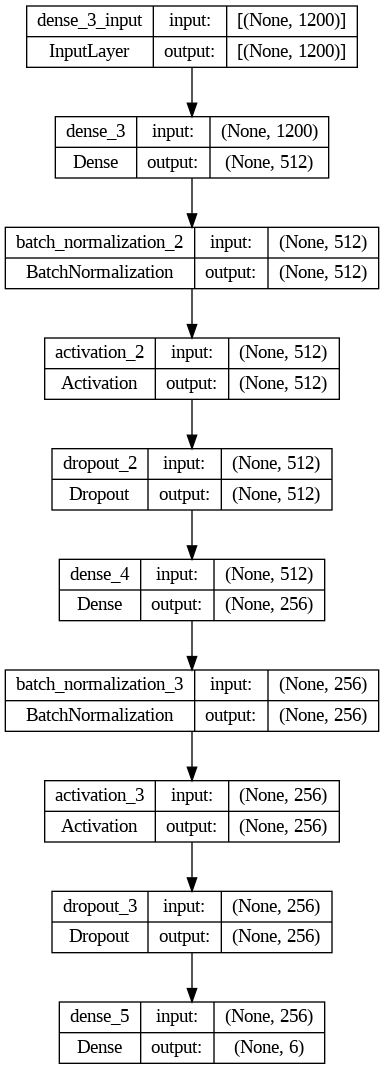

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
75/75 - 0s - loss: 0.2907 - accuracy: 0.5863 - 401ms/epoch - 5ms/step
Epoch 2/100
75/75 - 0s - loss: 0.2587 - accuracy: 0.6075 - 369ms/epoch - 5ms/step
Epoch 3/100
75/75 - 0s - loss: 0.2394 - accuracy: 0.6158 - 362ms/epoch - 5ms/step
Epoch 4/100
75/75 - 0s - loss: 0.2264 - accuracy: 0.6137 - 363ms/epoch - 5ms/step
Epoch 5/100
75/75 - 0s - loss: 0.2200 - accuracy: 0.6183 - 359ms/epoch - 5ms/step
Epoch 6/100
75/75 - 0s - loss: 0.2124 - accuracy: 0.6229 - 385ms/epoch - 5ms/step
Epoch 7/100
75/75 - 0s - loss: 0.2114 - accuracy: 0.6308 - 373ms/epoch - 5ms/step
Epoch 8/100
75/75 - 0s - loss: 0.2060 - accuracy: 0.6304 - 369ms/epoch - 5ms/step
Epoch 9/100
75/75 - 0s - loss: 0.2087 - accuracy: 0.6196 - 368ms/epoch - 5ms/step
Epoch 10/100
75/75 - 0s - loss: 0.2049 - accuracy: 0.6283 - 378ms/epoch - 5ms/step
Epoch 11/100
75/75 - 0s - loss: 0.1945 - accuracy: 0.6183 - 373ms/epoch - 5ms/step
Epoch 12/100
75/75 - 0s - loss: 0.1983 - accuracy: 0.6329 - 366ms/epoch - 5ms/step
Epoch 13/100


In [ ]:
# Predict probabilities
y_pred_probs = model.predict(x_test)

19/19 [==============================] - 0s 3ms/step


In [ ]:
y_test_array = y_test.values if isinstance(y_test, pd.DataFrame) else y_test
y_pred_probs_array = y_pred_probs.values if isinstance(y_pred_probs, pd.DataFrame) else y_pred_probs

In [ ]:
n_labels = y_test_array.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_array[:, i], y_pred_probs_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


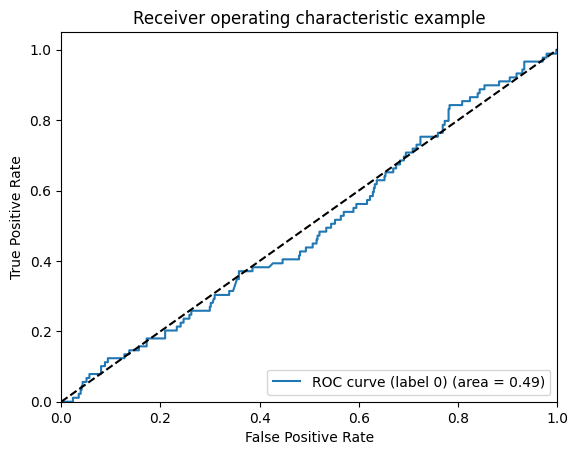

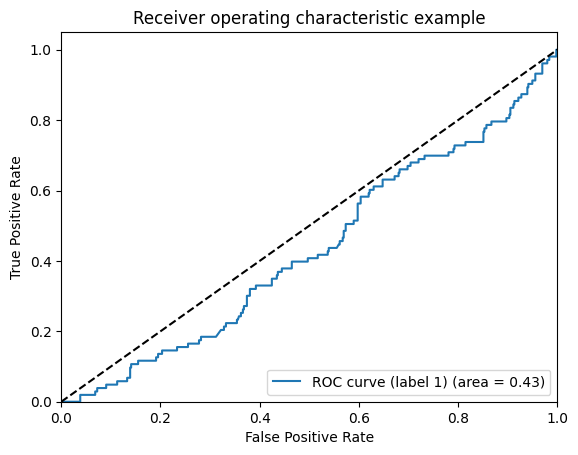

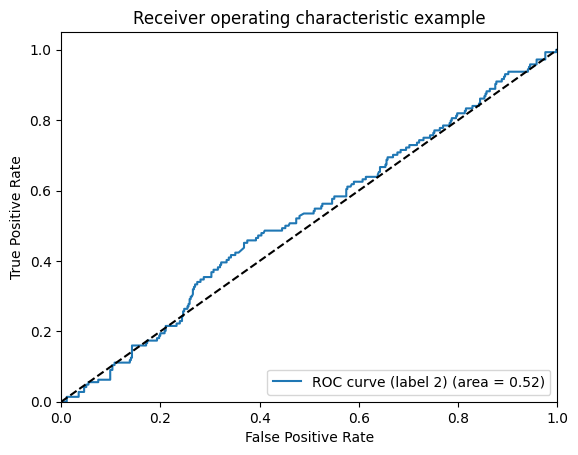

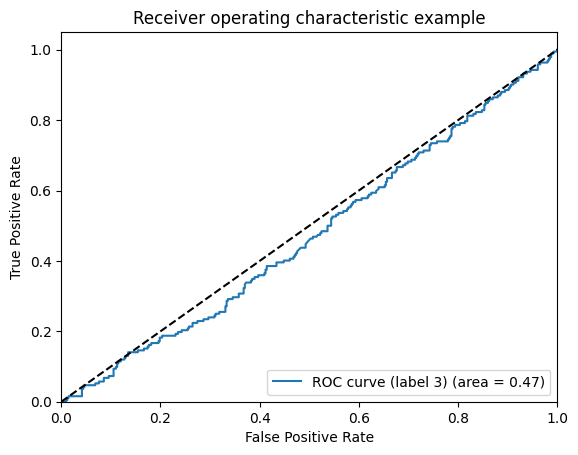

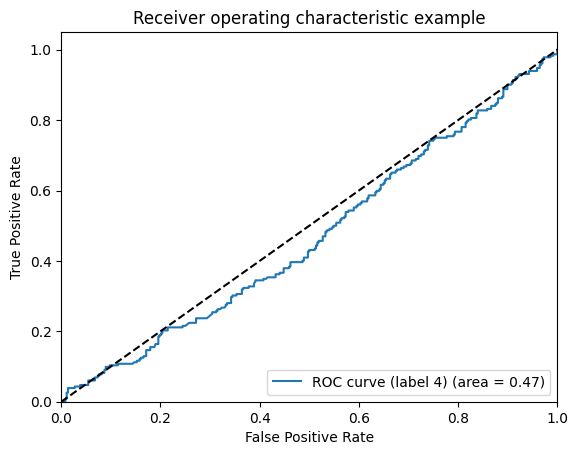

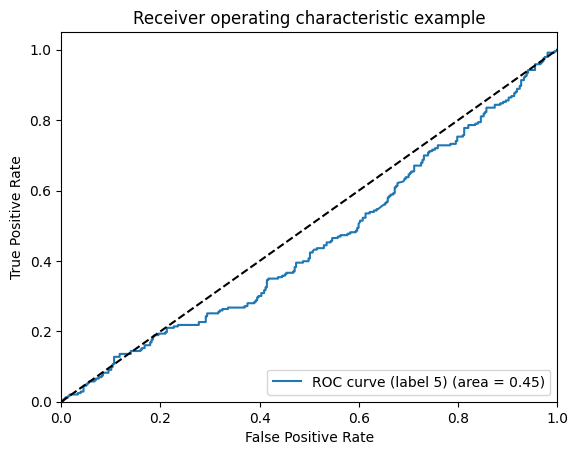

In [ ]:
# Plotting individual ROC Curves
for i in range(n_labels):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (label {i}) (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
average_roc_auc = np.mean(list(roc_auc.values()))
print(f'Average ROC AUC: {average_roc_auc:.2f}')


Average ROC AUC: 0.47


In [ ]:
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

75/75 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.6500
Test Loss: 0.08489879220724106, Test Accuracy: 0.6499999761581421


In [ ]:
model.save("ANN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* Model - 3 ClassifierChain

In [ ]:
from sklearn.multioutput import ClassifierChain

In [ ]:
chain = ClassifierChain(est)
chain.fit(x_train, y_train)
y_pred = chain.predict(x_test)
probs = chain.predict_proba(x_test)

probs

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:54:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:54:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:54:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method

array([[0.10389597, 0.08611916, 0.1061166 , 0.07961755, 0.88003762,
        0.06144151],
       [0.6270271 , 0.10679226, 0.2552998 , 0.09314193, 0.29963513,
        0.66538925],
       [0.0859888 , 0.11024694, 0.1162695 , 0.09772795, 0.41895002,
        0.66700301],
       ...,
       [0.07461614, 0.10807085, 0.20537235, 0.11626105, 0.8392531 ,
        0.04324921],
       [0.2766719 , 0.10433188, 0.30821801, 0.43153946, 0.09035962,
        0.83157074],
       [0.07748157, 0.09599968, 0.11316578, 0.11772007, 0.57562036,
        0.07089278]])

In [ ]:
score = roc_auc_score(y_test, probs)
print('ROC_AUC', score)

ROC_AUC 0.48333074235351864


<h1>Hyperparameter Tuning using GridSearchCV</h1>


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model(optimizer='adam', neurons=32, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(x_train.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation='sigmoid'))  # 'sigmoid' for multi-label classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__neurons': [16, 32, 64],
    'model__dropout_rate': [0.0, 0.1, 0.2],
}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print(f"Best params: {grid_result.best_params_}")

Best params: {'model__dropout_rate': 0.0, 'model__neurons': 64, 'model__optimizer': 'adam'}
